In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

df = pd.read_csv('clean_data/data_meteo_prod_region.csv')

In [2]:
region = gpd.read_file("regions-20180101.shp")

In [3]:
region = region.drop([0,1,2,7,11,13],0)

In [4]:
dfgeo=df.groupby(['latitude','longitude','region'],as_index=False).agg({'prod_totale':'sum','thermique_mw':'sum','nucleaire_mw':'sum','bioenergies_mw':'sum','eolien_mw':'sum','solaire_mw':'sum','pompage_mw':'sum','hydraulique_mw':'sum'})
dfgeo = dfgeo.groupby(['region'],as_index=False).agg({'latitude':'min','longitude':'min','prod_totale':'sum','thermique_mw':'sum','nucleaire_mw':'sum','bioenergies_mw':'sum','eolien_mw':'sum','solaire_mw':'sum','hydraulique_mw':'sum','pompage_mw':'sum'})
l=[dfgeo['thermique_mw'].sum()/dfgeo['prod_totale'].sum(),
   dfgeo['nucleaire_mw'].sum()/dfgeo['prod_totale'].sum(),
   dfgeo['bioenergies_mw'].sum()/dfgeo['prod_totale'].sum(),
   dfgeo['eolien_mw'].sum()/dfgeo['prod_totale'].sum(),
   dfgeo['solaire_mw'].sum()/dfgeo['prod_totale'].sum(),
   dfgeo['hydraulique_mw'].sum()/dfgeo['prod_totale'].sum()]
liste_filiere=['thermique_mw','nucleaire_mw','bioenergies_mw','eolien_mw','solaire_mw','hydraulique_mw'] 
nom_taille_point=['thermique_mw_tp','nucleaire_mw_tp','bioenergies_mw_tp','eolien_mw_tp','solaire_mw_tp','hydraulique_mw_tp']
dfgeo['taille_point'] = dfgeo['prod_totale'].apply(lambda x : x/(dfgeo['prod_totale'].sum())*20000)
for a,f,n in zip(l,liste_filiere,nom_taille_point):
    dfgeo[n] = dfgeo[f].apply(lambda x : (x/(dfgeo[f].sum())*20000)*a)

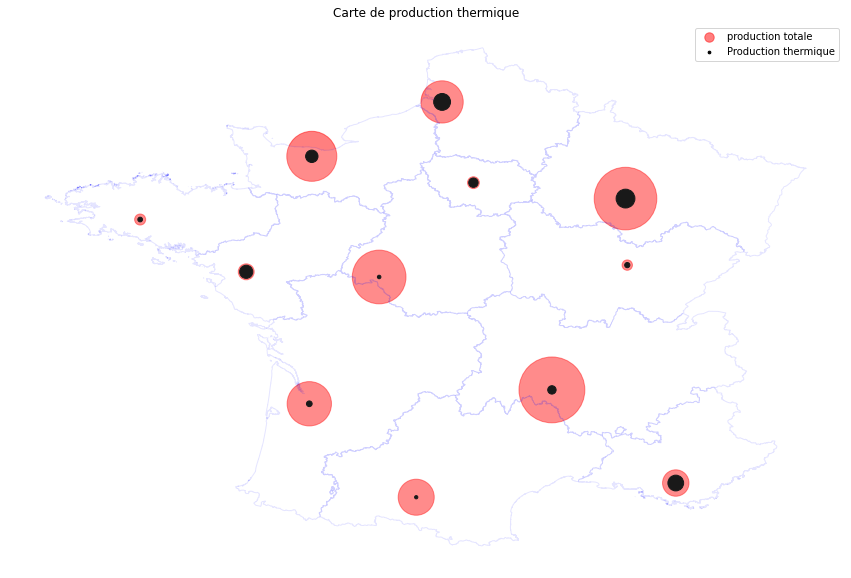

In [5]:
dfgeo = dfgeo[(dfgeo['latitude']!=0.0) & (dfgeo['longitude']!=0.0)].dropna(subset=['latitude', 'longitude'], axis=0)
geometry = [Point(xy) for xy in zip(dfgeo['longitude'], dfgeo['latitude'])]
geo_df = gpd.GeoDataFrame(dfgeo,crs="EPSG:4326", geometry=geometry)

figure, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')
plt.axis('off')

geo_df.plot(ax=ax, markersize='taille_point', color='red',alpha=0.5, label='production totale')

geo_df[geo_df['thermique_mw']>1].plot(ax=ax, markersize='thermique_mw_tp', color='black', label='Production thermique')
region.plot(ax=ax, color='white', edgecolor='blue',alpha=0.1)
plt.title('Carte de production thermique')
plt.legend(markerscale=0.2);

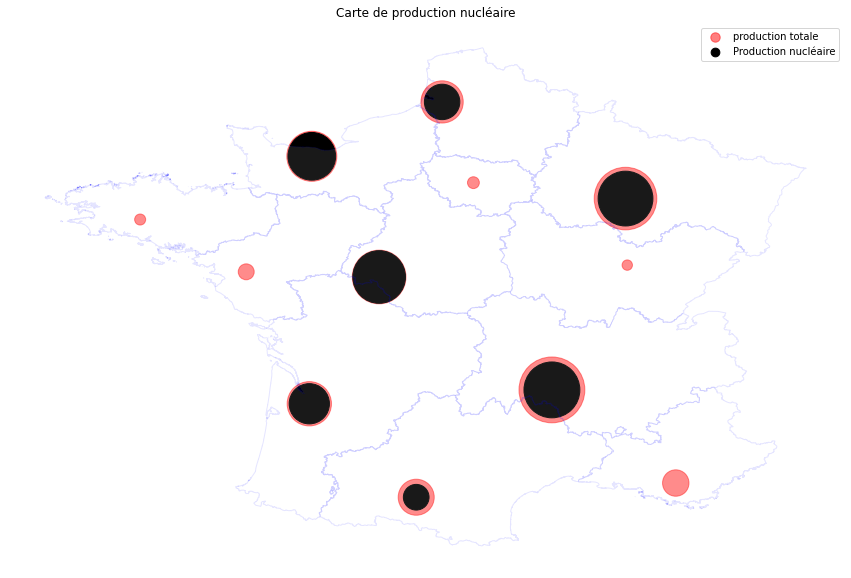

In [6]:
figure, ax = plt.subplots(figsize=(15,15))
plt.axis('off')
ax.set_aspect('equal')
geo_df[geo_df['prod_totale']>100].plot(ax=ax, markersize='taille_point', color='red',alpha=0.5, label='production totale')
geo_df[geo_df['nucleaire_mw']>1].plot(ax=ax, markersize='nucleaire_mw_tp', color='black', label='Production nucléaire')
region.plot(ax=ax, color='white', edgecolor='blue',alpha=0.1)

plt.title('Carte de production nucléaire')

plt.legend(markerscale=0.2);

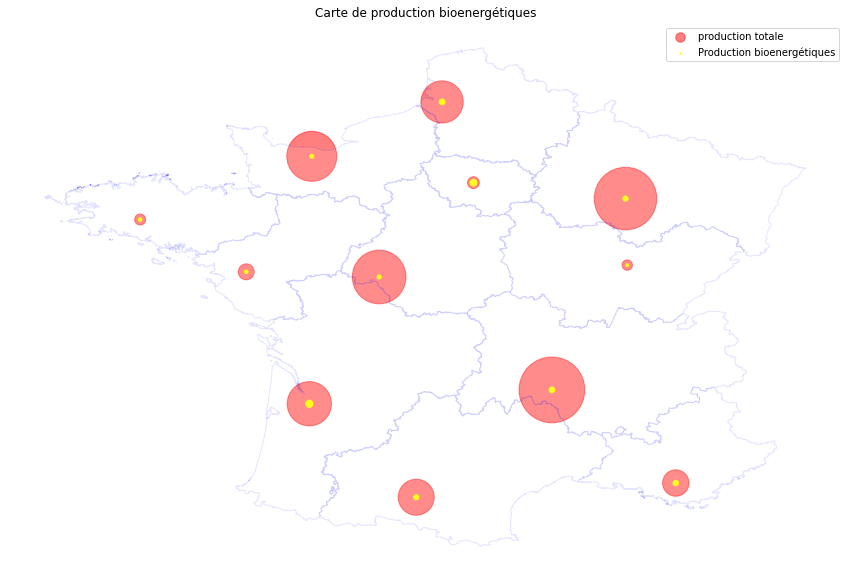

In [7]:
figure, ax = plt.subplots(figsize=(15,15))
plt.axis('off')
ax.set_aspect('equal')
geo_df[geo_df['prod_totale']>100].plot(ax=ax, markersize='taille_point', color='red',alpha=0.5, label='production totale')
geo_df[geo_df['bioenergies_mw']>1].plot(ax=ax, markersize='bioenergies_mw_tp', color='yellow', label='Production bioenergétiques')
region.plot(ax=ax, color='white', edgecolor='blue',alpha=0.1)
plt.title('Carte de production bioenergétiques')
plt.legend(markerscale=0.2);

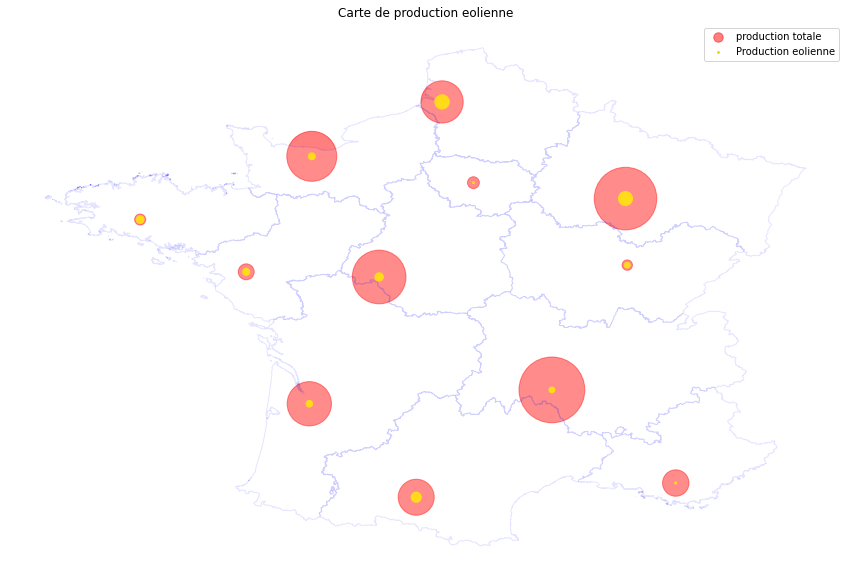

In [8]:
figure, ax = plt.subplots(figsize=(15,15))
plt.axis('off')
ax.set_aspect('equal')
geo_df[geo_df['prod_totale']>100].plot(ax=ax, markersize='taille_point', color='red',alpha=0.5, label='production totale')
geo_df[geo_df['eolien_mw']>1].plot(ax=ax, markersize='eolien_mw_tp', color='gold', label='Production eolienne')
region.plot(ax=ax, color='white', edgecolor='blue',alpha=0.1)
plt.title('Carte de production eolienne')
plt.legend(markerscale=0.2);

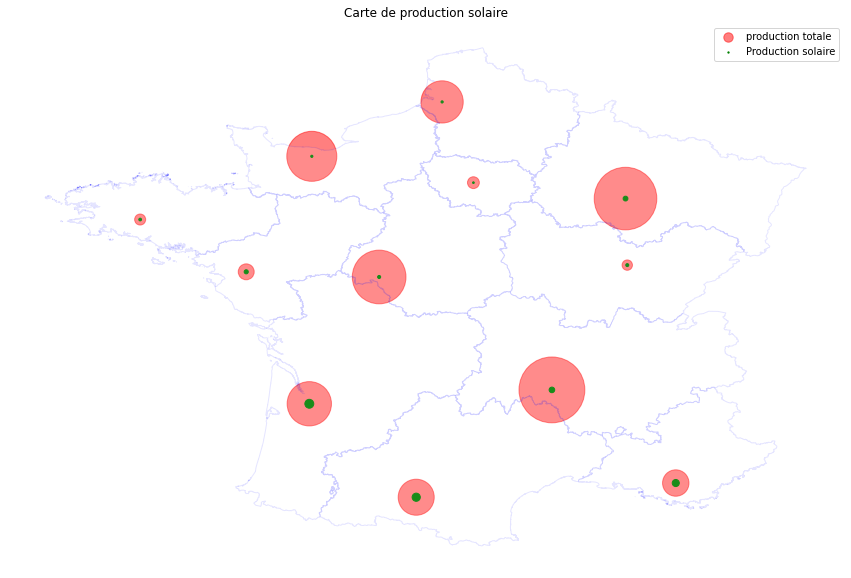

In [9]:
figure, ax = plt.subplots(figsize=(15,15))
plt.axis('off')
ax.set_aspect('equal')
geo_df[geo_df['prod_totale']>100].plot(ax=ax, markersize='taille_point', color='red',alpha=0.5, label='production totale')
geo_df[geo_df['solaire_mw']>1].plot(ax=ax, markersize='solaire_mw_tp', color='green', label='Production solaire')
region.plot(ax=ax, color='white', edgecolor='blue',alpha=0.1)
plt.title('Carte de production solaire')
plt.legend(markerscale=0.2);

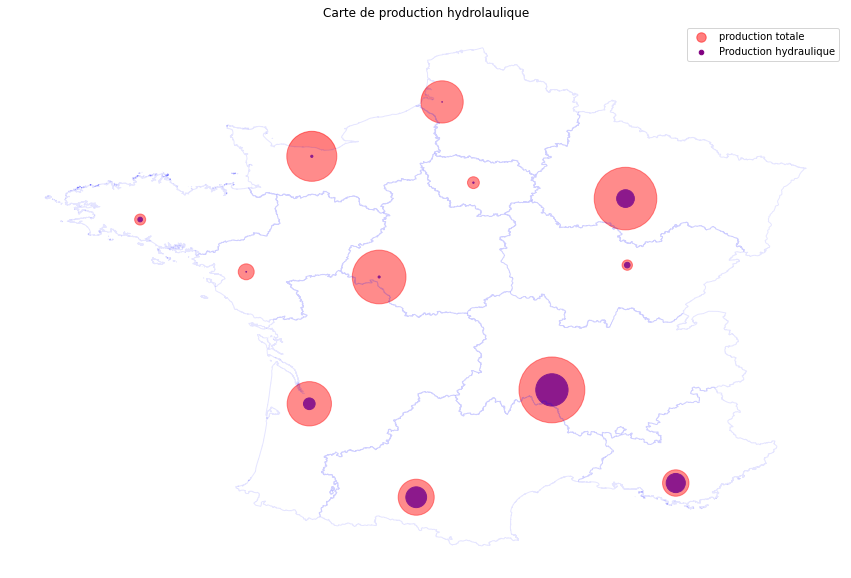

In [10]:
figure, ax = plt.subplots(figsize=(15,15))
plt.axis('off')
ax.set_aspect('equal')
geo_df[geo_df['prod_totale']>100].plot(ax=ax, markersize='taille_point', color='red',alpha=0.5, label='production totale')
geo_df[geo_df['hydraulique_mw']>1].plot(ax=ax, markersize='hydraulique_mw_tp', color='purple', label='Production hydraulique')
region.plot(ax=ax, color='white', edgecolor='blue',alpha=0.1)
plt.title('Carte de production hydrolaulique')
plt.legend(markerscale=0.2);

In [11]:
df2=pd.read_csv('clean_data/data_clean.csv')

In [12]:
df2=df2.groupby(['region'],as_index=False).agg({'prod_totale':'sum','thermique_mw':'sum','nucleaire_mw':'sum','bioenergies_mw':'sum','eolien_mw':'sum','solaire_mw':'sum','pompage_mw':'sum','consommation_mw':'sum','hydraulique_mw':'sum'})

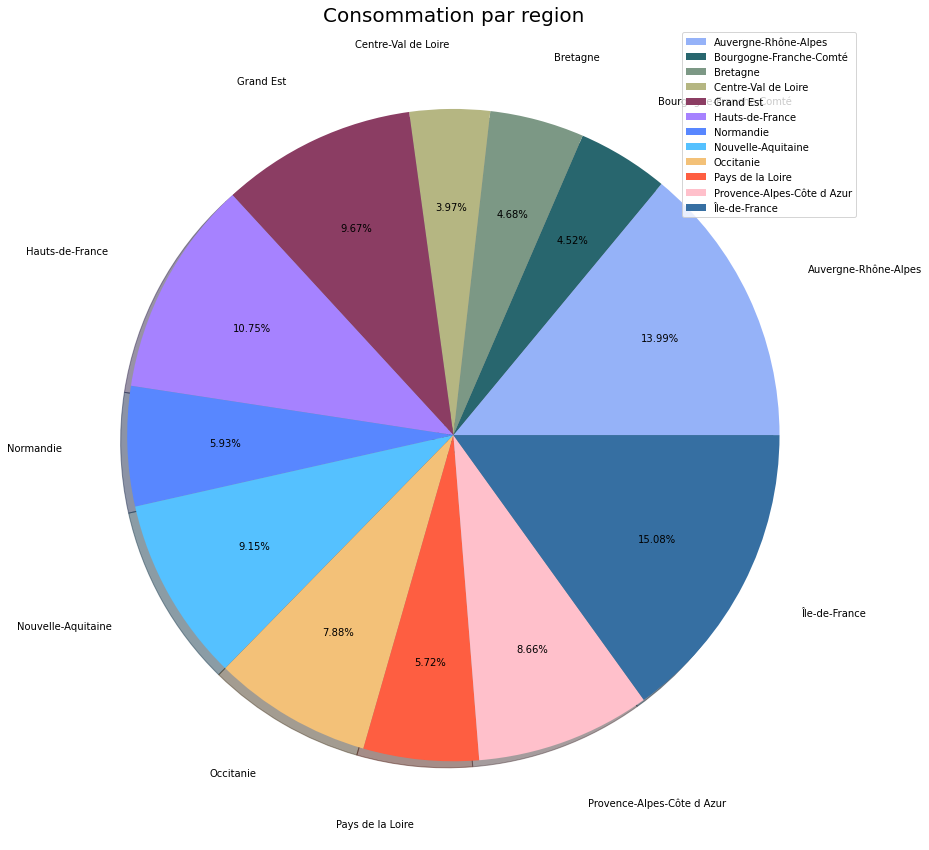

In [13]:
plt.figure(figsize = (15, 15))
plt.pie(x = df2.consommation_mw, labels = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','Pays de la Loire','Provence-Alpes-Côte d Azur','Île-de-France'],
           colors = ["#95B2F8","#28666e","#7c9885","#b5b682","#8b3d63","#a682ff","#5887ff","#55c1ff","#f3c178","#fe5e41",'pink','#366fa2'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True)
plt.title("Consommation par region",fontsize=20)
plt.legend();

<Figure size 576x432 with 0 Axes>

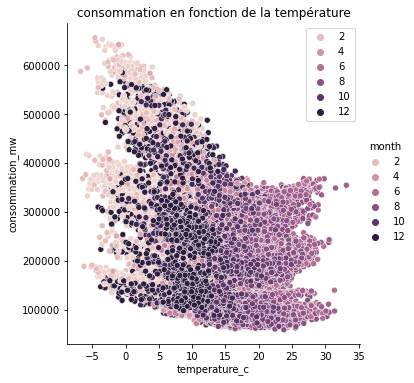

In [14]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6))
df['date'] =  pd.to_datetime(df['date'])
df['month']=df['date'].apply(lambda x : x.month)
sns.relplot(x='temperature_c',y='consommation_mw',hue='month',data=df);
plt.title("consommation en fonction de la température")
plt.legend();

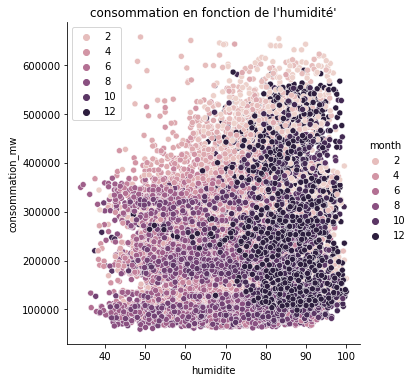

In [15]:
sns.relplot(x='humidite',y='consommation_mw',hue='month',data=df);
plt.title("consommation en fonction de l'humidité'")
plt.legend();
